In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib as plt
import seaborn as sns

# Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
#Display multiple outputs from a Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
path = os.chdir("//gdrive/MyDrive/Functional_Analytics/")
data_df = pd.read_csv('heart.csv', encoding='latin')
data_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


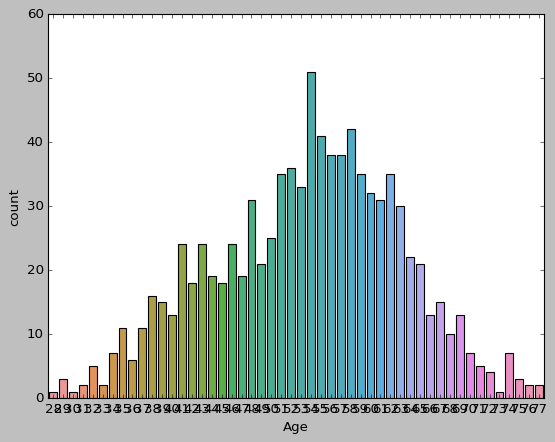

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data_df["Age"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


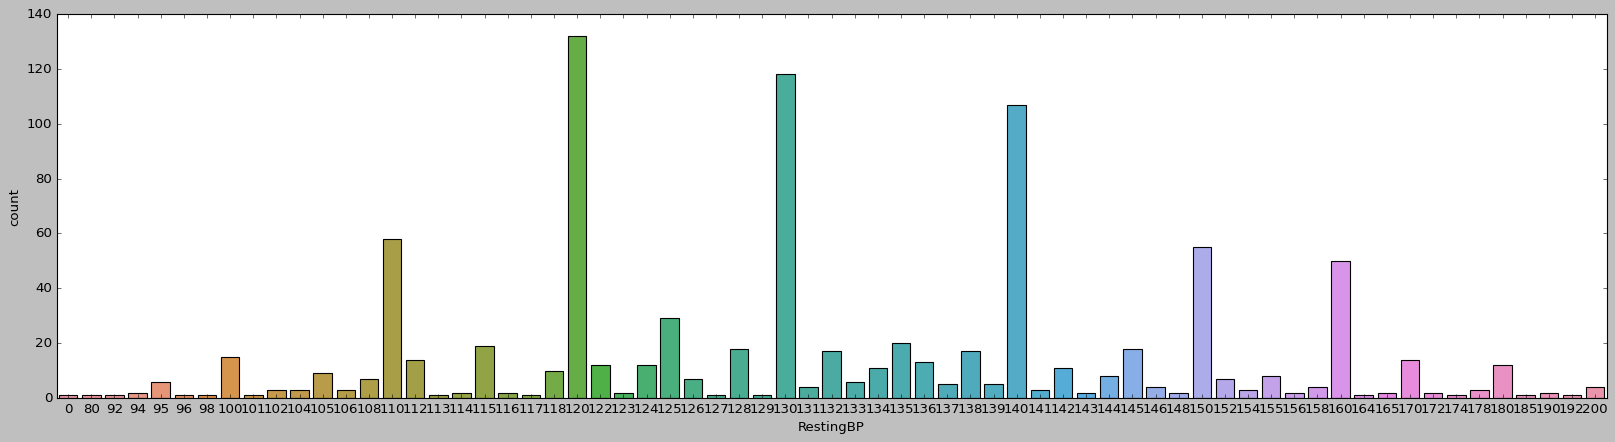

In [8]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(25,6))
sns.countplot(data_df["RestingBP"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol Distribution [ μ: 198.80 ]')

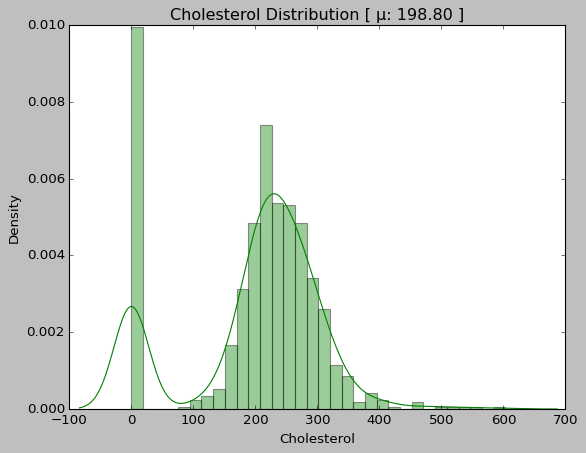

In [10]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data_df["Cholesterol"], color="g")
plt.title(f"Cholesterol Distribution [ \u03BC: {data_df['Cholesterol'].mean():.2f} ]")
plt.show()

([<matplotlib.patches.Wedge at 0x7f6e8df92990>,
 [Text(-0.1835941114214546, 1.0845705151124876, 'Does Not Have Heart Disease'),
  Text(0.2002844851870415, -1.1831678346681682, 'Has Heart Disease')])

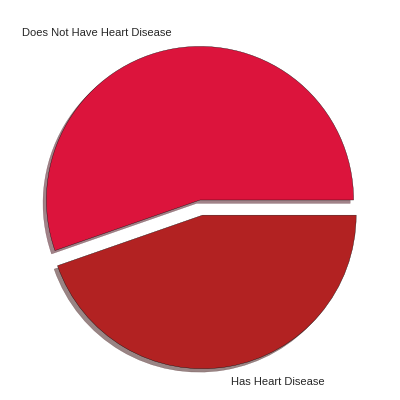

In [11]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=data_df["HeartDisease"].value_counts(), 
        colors=["crimson","firebrick"], 
        labels=["Does Not Have Heart Disease","Has Heart Disease"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.show()

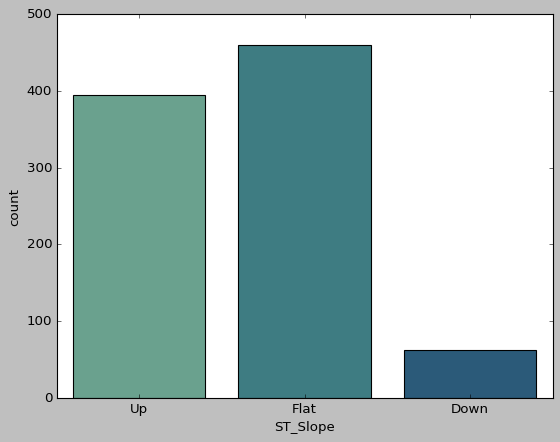

In [13]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=data_df["ST_Slope"], palette="crest");

([<matplotlib.patches.Wedge at 0x7f6e8d7ea0d0>,
 [Text(-0.32628552463094623, 1.0504940534892657, 'No'),
  Text(0.3559477377562834, -1.1459935462236184, 'Yes')])

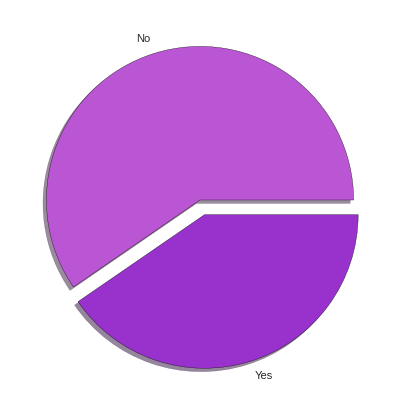

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=data_df["ExerciseAngina"].value_counts(), 
        colors=["mediumorchid","darkorchid"], 
        labels=["No","Yes"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.show()

In [16]:
#to obtain all numeric columns
numeric = [col for col in data_df.columns if data_df[col].dtypes!='object']
print('numeric columns are:',numeric)
#to obtain all categorical columns
categorical = [col for col in data_df.columns if data_df[col].dtypes=='object']
print('categorical columns are:',categorical)

numeric columns are: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
categorical columns are: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [17]:
cat_df =data_df[categorical]
numeric_df= data_df[numeric]

In [18]:
cat_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [19]:
numeric_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_df['Sex'] = le.fit_transform(cat_df['Sex'])
cat_df['ChestPainType'] = le.fit_transform(cat_df['ChestPainType'])
cat_df['RestingECG'] = le.fit_transform(cat_df['RestingECG'])
cat_df['ExerciseAngina'] = le.fit_transform(cat_df['ExerciseAngina'])
cat_df['ST_Slope'] = le.fit_transform(cat_df['ST_Slope'])

cat_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
5,1,2,1,0,2
6,0,1,1,0,2
7,1,1,1,0,2
8,1,0,1,1,1
9,0,1,1,0,2


In [21]:
import pandas as pd
df = pd.concat([cat_df,numeric_df],axis=1)

In [22]:
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


In [23]:
ds= df.iloc[:,:-1]
y= df.iloc[:,[-1]]

In [24]:
ds

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,1,1,1,0,2,40,140,289,0,172,0.0
1,0,2,1,0,1,49,160,180,0,156,1.0
2,1,1,2,0,2,37,130,283,0,98,0.0
3,0,0,1,1,1,48,138,214,0,108,1.5
4,1,2,1,0,2,54,150,195,0,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2
914,1,0,1,0,1,68,144,193,1,141,3.4
915,1,0,1,1,1,57,130,131,0,115,1.2
916,0,1,0,0,1,57,130,236,0,174,0.0


In [25]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [26]:
ss = StandardScaler()
x = ss.fit_transform(ds.iloc[:,5:])

In [27]:
X_train,X_test, y_train,y_test = train_test_split(
                                                  x,
                                                  y,
                                                  test_size = 0.25
                                                  )
X_train.shape  
X_test.shape  

(688, 6)

(230, 6)

In [28]:
no_of_samples_tr = X_train.shape[0]
input_features = X_train.shape[1]               
channels = 1
batch_size_tr = no_of_samples_tr    

In [29]:
no_of_samples_test = X_test.shape[0]          
input_features = X_test.shape[1]             
channels = 1
batch_size_test = no_of_samples_test

In [30]:
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [31]:
train.shape  
test.shape 

(688, 6, 1)

(230, 6, 1)

In [32]:
inputs = tf.keras.Input(
                         shape = (train.shape[1],train.shape[2])  
                        )

In [64]:
import tensorflow as tf
from tensorflow.keras import layers
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

In [65]:
x_left = layers.Conv1D(
                       filters = 128,
                       kernel_size=2,
                       activation='relu'
                       )(x_left)

In [66]:
x_rt = layers.Conv1D(
                      filters = 32,
                      kernel_size=3,
                      activation='relu'
                    )(inputs)

In [67]:
x_rt = layers.Conv1D(
                      filters = 64,
                      kernel_size=2,
                      activation='relu'
                    )(x_rt)

In [68]:
x = tf.keras.layers.concatenate([x_left,x_rt])

In [69]:
x = layers.Flatten()(x)

In [70]:
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [71]:
out = layers.Dense(1,activation = 'sigmoid')(x)

In [72]:
model = Model(inputs = [inputs], outputs = [out])

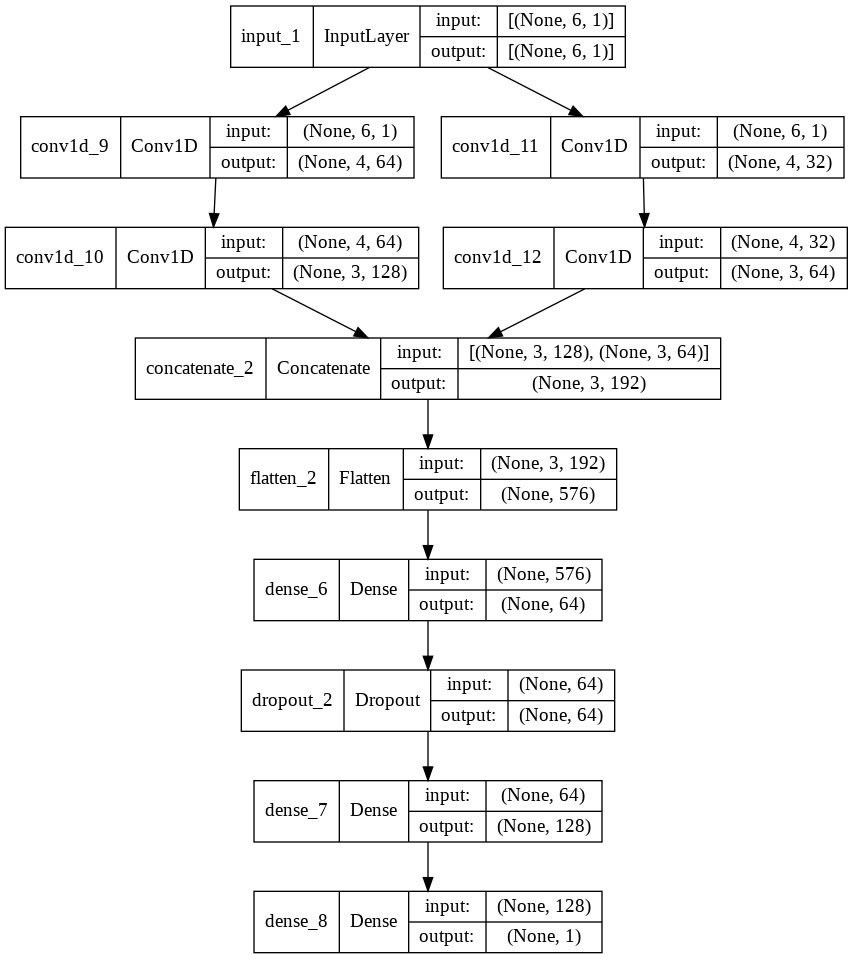

In [73]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes= True)

In [74]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 1)]       0           []                               
                                                                                                  
 conv1d_9 (Conv1D)              (None, 4, 64)        256         ['input_1[0][0]']                
                                                                                                  
 conv1d_11 (Conv1D)             (None, 4, 32)        128         ['input_1[0][0]']                
                                                                                                  
 conv1d_10 (Conv1D)             (None, 3, 128)       16512       ['conv1d_9[0][0]']               
                                                                                            

In [75]:
model.compile(
               optimizer = 'adam',
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics = ['accuracy']
               )

In [76]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)

In [77]:
history = model.fit(
                    train,
                    y_train,
                    epochs = 100,
                    verbose = 1
                    )

Epoch 1/100
22/22 [==============================] - 2s 7ms/step - loss: 0.6199 - accuracy: 0.6919
Epoch 2/100
22/22 [==============================] - 0s 7ms/step - loss: 0.5197 - accuracy: 0.7762
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 0.4914 - accuracy: 0.7703
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.4627 - accuracy: 0.7878
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.4770 - accuracy: 0.8023
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss: 0.4654 - accuracy: 0.7892
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 0.4619 - accuracy: 0.7849
Epoch 8/100
22/22 [==============================] - 0s 8ms/step - loss: 0.4572 - accuracy: 0.7936
Epoch 9/100
22/22 [==============================] - 0s 6ms/step - loss: 0.4518 - accuracy: 0.7791
Epoch 10/100
22/22 [==============================] - 0s 6ms/step - loss: 0.4387 - accuracy: 0.7994
Epoch 11/

In [78]:
model.evaluate(test,y_test)

8/8 [==============================] - 0s 4ms/step - loss: 1.2298 - accuracy: 0.7348


[1.2298158407211304, 0.7347826361656189]